In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
import sklearn.linear_model as LM
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.datasets import make_regression
from sklearn import tree

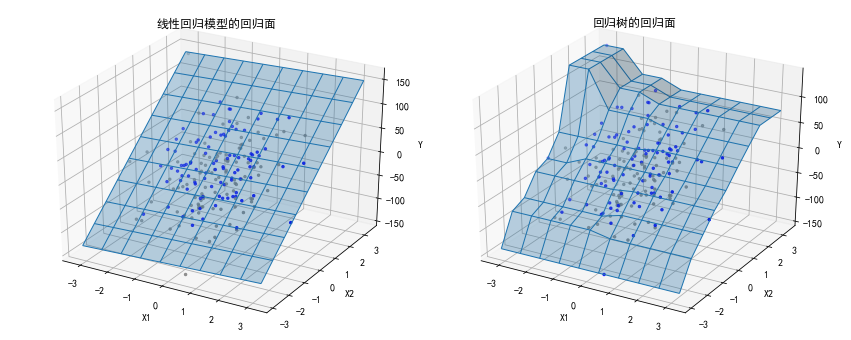

In [2]:
X,Y=make_regression(n_samples=200,n_features=2,n_informative=2,noise=10,random_state=666)
modelLR=LM.LinearRegression()
modelLR.fit(X,Y)
modelDTC = tree.DecisionTreeRegressor(max_depth=5,random_state=123)
modelDTC.fit(X,Y)
data=pd.DataFrame(X)

x,y = np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),10), np.linspace(X[:,1].min(),X[:,1].max(),10))
Xtmp=np.column_stack((x.flatten(),y.flatten())) #Xtmp=np.hstack((x.reshape(100,1),y.reshape(100,1)))

fig = plt.figure(figsize=(15,6))
ax0 = fig.add_subplot(121, projection='3d') 
data['col']='grey'
data.loc[modelLR.predict(X)<=Y,'col']='blue' 
ax0.scatter(X[:,0],X[:,1],Y,marker='o',s=6,c=data['col'])
ax0.plot_wireframe(x, y, modelLR.predict(Xtmp).reshape(10,10),linewidth=1)
ax0.plot_surface(x, y, modelLR.predict(Xtmp).reshape(10,10), alpha=0.3)
ax0.set_xlabel('X1')
ax0.set_ylabel('X2')
ax0.set_zlabel('Y')
ax0.set_title('线性回归模型的回归面')

ax1 = fig.add_subplot(122, projection='3d') 
data['col']='grey'
data.loc[modelDTC.predict(X)<=Y,'col']='blue' 
ax1.scatter(X[:,0],X[:,1],Y,marker='o',s=6,c=data['col'])
ax1.plot_wireframe(x, y, modelDTC.predict(Xtmp).reshape(10,10),linewidth=1)
ax1.plot_surface(x, y, modelDTC.predict(Xtmp).reshape(10,10), alpha=0.3)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Y')
ax1.set_title('回归树的回归面')
#fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0)

说明：1、利用模拟数据直观展示回归树的回归面，并与一般线性回归模型的回归平面进行对比
2、利用make_regression生成样本量等于200的三组模拟数据，其中两组为输入变量，一个为输出变量，两个输入变量和输出变量间具有线性关系。输出变量服从正态分布，标准差等于10。
3、引用sklearn中的tree包。DecisionTreeRegressor用于建立回归树。可指定树深度max_depth等参数。为提高算法效率DecisionTreeRegressor以随机方式选择最佳输入变量，并默认以基尼系数的变化量确定最佳组限值。为重现模型结果可指定random_state为任意整数。
4、基于模拟数据分别利用线性回归模型和树深度等于5的回归树。绘制三维散点图，其中指定实际值大于预测值的点为蓝色，反之为灰色。
5、在两个输入变量的取值范围内生成100个观测点。分别用线性回归模型和回归树预测100个观测点的输出变量值，并绘制回归面。